In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import missingno as msno
import boto3
import io

%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [100]:
import data_loader

df = data_loader.get_daily_data()

In [78]:
# df = data_loader.pd_read_s3_parquet(
#     key="mros_output.parquet", bucket="mros-output-bucket"
# )

In [128]:
df["local_time"]

0        07:04:55
1        09:13:48
2        09:30:13
3        13:56:03
4        06:37:23
           ...   
62738    09:36:45
62739    14:35:52
62740    12:47:49
62741    16:38:04
62742    14:57:59
Name: local_time, Length: 62743, dtype: object

In [99]:
df["latitude"].astype(float)

0        43.983455
1        40.479161
2        39.185300
3        44.723294
4        39.586575
           ...    
62541    45.514075
62542    46.947514
62543    45.657718
62544    48.074511
62545    40.638601
Name: latitude, Length: 62546, dtype: float64

In [4]:
hovertemplate

'<b>Rain</b><br>Elevation: %{customdata[0]:.0f} m<br>%{customdata[2]|%Y-%m-%d %H:%M} UTC<br><extra></extra>'

In [95]:
df["latitude"] = df["latitude"].round(3)
df["longitude"] = df["longitude"].round(3)

0                43.9834551
1         40.47916085203542
2                39.1853005
3         44.72329428329781
4        39.586575225170144
                ...        
62541     45.51407507639906
62542    46.947514421040346
62543            45.6577177
62544      48.0745113231713
62545            40.6386011
Name: latitude, Length: 62546, dtype: object

In [75]:
df["time"]

0        2024-01-26T12:04:56.000Z
1        2024-01-26T16:13:49.000Z
2        2024-01-26T17:30:14.000Z
3        2024-01-26T18:56:05.000Z
4        2024-01-26T13:37:24.000Z
                   ...           
62541    2024-03-26T19:38:37.000Z
62542    2024-03-26T01:06:16.000Z
62543    2024-03-26T18:14:48.000Z
62544    2024-03-26T10:54:57.000Z
62545    2024-03-26T20:14:17.000Z
Name: time, Length: 62546, dtype: object

In [72]:
pd.to_datetime(df["timestamp"].astype(float).astype(int))

0       1970-01-01 00:00:01.706270696
1       1970-01-01 00:00:01.706285629
2       1970-01-01 00:00:01.706290214
3       1970-01-01 00:00:01.706295365
4       1970-01-01 00:00:01.706276244
                     ...             
62541   1970-01-01 00:00:01.711481917
62542   1970-01-01 00:00:01.711415176
62543   1970-01-01 00:00:01.711476888
62544   1970-01-01 00:00:01.711450497
62545   1970-01-01 00:00:01.711484057
Name: timestamp, Length: 62546, dtype: datetime64[ns]

In [64]:
# Function to attempt to convert a string to an integer, returns None if unsuccessful
def safe_int(x):
    try:
        return float(x)
    except ValueError:
        return None


# Apply the safe_int function to the 'ID' column
df["ID_as_int"] = df["timestamp"].apply(safe_int)

# Locate rows where conversion failed
error_rows = df[df["ID_as_int"].isna()]

In [65]:
error_rows

,timestamp,createdtime,phase,latitude,longitude,submitted_time,local_time,submitted_date,local_date,comment,...,met2_id_raw,met2_datetime_raw,met2_temp_air_raw,met1_rh_raw,met2_rh_raw,met1_temp_dew_raw,met1_temp_wet_raw,met1_ppt_raw,all.id,ID_as_int


In [33]:
pd.to_datetime(int(df["timestamp"]), format="ns")

TypeError: cannot convert the series to <class 'int'>

In [179]:
[print(c) for c in df.columns]

id
timestamp
createdtime
name
latitude
longitude
submitted_time
local_time
submitted_date
local_date
comment
time
duplicate_id
duplicate_count
temp_air_idw_lapse_const
temp_air_idw_lapse_var
temp_air_nearest_site_const
temp_air_nearest_site_var
temp_air_avg_obs
temp_air_min_obs
temp_air_max_obs
temp_air_lapse_var
temp_air_lapse_var_r2
temp_air_lapse_var_pval
temp_air_n_stations
temp_air_avg_time_gap
temp_air_avg_dist
temp_air_nearest_id
temp_air_nearest_elev
temp_air_nearest_dist
temp_air_nearest
temp_dew_idw_lapse_const
temp_dew_idw_lapse_var
temp_dew_nearest_site_const
temp_dew_nearest_site_var
temp_dew_avg_obs
temp_dew_min_obs
temp_dew_max_obs
temp_dew_lapse_var
temp_dew_lapse_var_r2
temp_dew_lapse_var_pval
temp_dew_n_stations
temp_dew_avg_time_gap
temp_dew_avg_dist
temp_dew_nearest_id
temp_dew_nearest_elev
temp_dew_nearest_dist
temp_dew_nearest
rh
temp_wet
hads_counts
lcd_counts
wcc_counts
plp
elevation
eco_level3
eco_level4
state
temp_air_flag
rh_flag
dist_temp_air_flag
dist_temp_

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [125]:
pd.to_datetime(df["date_key"], format="%Y_%m_%d")

0       2024-02-02
1       2024-02-02
2       2024-02-02
3       2024-02-02
4       2024-02-02
           ...    
18988   2024-03-18
18989   2024-03-18
18990   2024-03-18
18991   2024-03-18
18992   2024-03-18
Name: date_key, Length: 18993, dtype: datetime64[ns]

In [196]:
df_obs["all.id"]

KeyError: 'all.id'

In [20]:
# Read single parquet file from S3
def pd_read_s3_parquet(key, bucket, s3_client=None, **args):
    if s3_client is None:
        s3_client = boto3.client("s3")
    obj = s3_client.get_object(Bucket=bucket, Key=key)
    return pd.read_parquet(io.BytesIO(obj["Body"].read()), **args)

In [76]:
with open("./data/cols.txt") as f:
    # Read the contents of the file into a variable
    cols = f.read()
    cols = cols.replace("\n", " ").split(" ")

In [3]:
bucket_name = "mros-output-bucket"

s3 = boto3.resource("s3")

s3.Bucket(bucket_name).objects.all()

s3.Bucket.objectsCollection(s3.Bucket(name='mros-output-bucket'), s3.ObjectSummary)

In [4]:
for i in s3.Bucket(bucket_name).objects.all():
    print(i.key)

mros_output.csv
mros_output.parquet


In [82]:
df = pd_read_s3_parquet(key="mros_output.parquet", bucket="mros-output-bucket")

In [88]:
df.name

0        Rain
1        Snow
2         Mix
3        Snow
4        Snow
         ... 
18946    Snow
18947    Snow
18948    Rain
18949    Rain
18950    Snow
Name: name, Length: 18951, dtype: object

In [164]:
df_obs = pd.read_csv("~/data/mros/mros_met_geog_2023_09_21_noAKCA.csv")
df_obs.index = pd.to_datetime(df_obs["datetime_utc"])
# add basic jitter


df_obs["latitude"] = df_obs["latitude"].round(3)
df_obs["longitude"] = df_obs["longitude"].round(3)

sigma = 0.001
df_obs["latitude"] = df_obs["latitude"].apply(lambda x: np.random.normal(x, sigma))
df_obs["longitude"] = df_obs["longitude"].apply(lambda x: np.random.normal(x, sigma))

df_obs["latitude"] = df_obs["latitude"].round(4)
df_obs["longitude"] = df_obs["longitude"].round(4)

# df_obs = df_obs.drop(columns=['id'])

In [165]:
df_obs

,all.id,id,latitude,longitude,phase,timezone,timezone_lst,datetime_utc,datetime_lst,elevation.m,...,temp_dew_avg_dist,temp_dew_nearest_id,temp_dew_nearest_elev,temp_dew_nearest_dist,temp_dew_nearest,rh,temp_wet,hads_counts,lcd_counts,wcc_counts
datetime_utc,,,,,,,,,,,,,,,,,,,,,
2021-10-25 04:11:00,8478,455189ab-1c2c-4545-9d09-eb677a1ffb80,42.5344,-114.5740,Rain,America/Boise,Etc/GMT+7,2021-10-25 04:11,2021-10-24 22:11,1202.378540,...,60655.71693,72586694178,1269.80000,10122.713240,6.111111,80.711547,7.690869,12.0,3.0,6.0
2021-11-09 14:50:00,8484,220a8e3b-babb-4342-a7f3-db16a331c6bd,43.5669,-116.1596,Rain,America/Boise,Etc/GMT+7,2021-11-09 14:50,2021-11-09 07:50,842.985535,...,52732.72522,LLAI1,872.45807,4023.697297,5.183126,53.393553,1.240968,17.0,5.0,13.0
2021-12-22 18:38:00,8890,cebee6bd-7aa3-4b39-814e-4756930ee30b,43.6777,-114.3663,Snow,America/Boise,Etc/GMT+7,2021-12-22 18:38,2021-12-22 11:38,1774.080933,...,60103.75726,OHOI1,1890.00000,9552.606905,-3.057018,81.544568,-2.396512,24.0,3.0,21.0
2022-04-28 21:23:00,11968,41a3d741-3d7b-4f0b-bba4-4e8369a08de4,44.6946,-116.0792,Rain,America/Boise,Etc/GMT+7,2022-04-28 21:23,2022-04-28 15:23,1481.619995,...,56111.09982,72586494182,1531.10000,22339.154560,-0.555556,78.867963,2.355526,16.0,1.0,14.0
2022-04-28 22:34:00,11969,9237b97b-d02a-4ac3-acb3-73a2dec4fa8c,44.6933,-116.0791,Mix,America/Boise,Etc/GMT+7,2022-04-28 22:34,2022-04-28 16:34,1481.566406,...,56111.08497,72586494182,1531.10000,22337.489580,-1.111111,78.525709,2.290342,16.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 16:23:00,21984,4ac1afac-754d-4304-a222-0dab1d0aa140,33.5852,-112.2114,Rain,America/Phoenix,Etc/GMT+7,2023-01-01 16:23,2023-01-01 09:23,355.199646,...,48204.68196,72278753126,324.90000,10156.095520,11.111111,89.683098,11.438172,8.0,11.0,0.0
2023-01-01 18:41:00,21992,917ab5a2-4b4e-40b9-8b91-229c89803162,33.5856,-112.2108,Rain,America/Phoenix,Etc/GMT+7,2023-01-01 18:41,2023-01-01 11:41,355.279968,...,47431.54844,72278753126,324.90000,10145.963870,12.222222,93.656196,12.045899,8.0,11.0,0.0
2023-01-02 03:32:00,22015,1fa6cfe7-6cae-42b9-8327-c744639642f6,33.5837,-112.2122,Rain,America/Phoenix,Etc/GMT+7,2023-01-02 03:32,2023-01-01 20:32,355.288544,...,50092.42150,72278523111,330.70000,15064.366420,10.000000,86.266023,8.240029,8.0,10.0,0.0


In [166]:
res = df_obs.columns.str.lower()


def clean_cols_names(x):
    return x.split(".", 1)[-1].replace(" ", "_").replace("[^a-zA-Z0-9_]", "")


df_obs.rename(columns=clean_cols_names, inplace=True)

In [167]:
df_obs

,id,id,latitude,longitude,phase,timezone,timezone_lst,datetime_utc,datetime_lst,m,...,temp_dew_avg_dist,temp_dew_nearest_id,temp_dew_nearest_elev,temp_dew_nearest_dist,temp_dew_nearest,rh,temp_wet,hads_counts,lcd_counts,wcc_counts
datetime_utc,,,,,,,,,,,,,,,,,,,,,
2021-10-25 04:11:00,8478,455189ab-1c2c-4545-9d09-eb677a1ffb80,42.5344,-114.5740,Rain,America/Boise,Etc/GMT+7,2021-10-25 04:11,2021-10-24 22:11,1202.378540,...,60655.71693,72586694178,1269.80000,10122.713240,6.111111,80.711547,7.690869,12.0,3.0,6.0
2021-11-09 14:50:00,8484,220a8e3b-babb-4342-a7f3-db16a331c6bd,43.5669,-116.1596,Rain,America/Boise,Etc/GMT+7,2021-11-09 14:50,2021-11-09 07:50,842.985535,...,52732.72522,LLAI1,872.45807,4023.697297,5.183126,53.393553,1.240968,17.0,5.0,13.0
2021-12-22 18:38:00,8890,cebee6bd-7aa3-4b39-814e-4756930ee30b,43.6777,-114.3663,Snow,America/Boise,Etc/GMT+7,2021-12-22 18:38,2021-12-22 11:38,1774.080933,...,60103.75726,OHOI1,1890.00000,9552.606905,-3.057018,81.544568,-2.396512,24.0,3.0,21.0
2022-04-28 21:23:00,11968,41a3d741-3d7b-4f0b-bba4-4e8369a08de4,44.6946,-116.0792,Rain,America/Boise,Etc/GMT+7,2022-04-28 21:23,2022-04-28 15:23,1481.619995,...,56111.09982,72586494182,1531.10000,22339.154560,-0.555556,78.867963,2.355526,16.0,1.0,14.0
2022-04-28 22:34:00,11969,9237b97b-d02a-4ac3-acb3-73a2dec4fa8c,44.6933,-116.0791,Mix,America/Boise,Etc/GMT+7,2022-04-28 22:34,2022-04-28 16:34,1481.566406,...,56111.08497,72586494182,1531.10000,22337.489580,-1.111111,78.525709,2.290342,16.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 16:23:00,21984,4ac1afac-754d-4304-a222-0dab1d0aa140,33.5852,-112.2114,Rain,America/Phoenix,Etc/GMT+7,2023-01-01 16:23,2023-01-01 09:23,355.199646,...,48204.68196,72278753126,324.90000,10156.095520,11.111111,89.683098,11.438172,8.0,11.0,0.0
2023-01-01 18:41:00,21992,917ab5a2-4b4e-40b9-8b91-229c89803162,33.5856,-112.2108,Rain,America/Phoenix,Etc/GMT+7,2023-01-01 18:41,2023-01-01 11:41,355.279968,...,47431.54844,72278753126,324.90000,10145.963870,12.222222,93.656196,12.045899,8.0,11.0,0.0
2023-01-02 03:32:00,22015,1fa6cfe7-6cae-42b9-8327-c744639642f6,33.5837,-112.2122,Rain,America/Phoenix,Etc/GMT+7,2023-01-02 03:32,2023-01-01 20:32,355.288544,...,50092.42150,72278523111,330.70000,15064.366420,10.000000,86.266023,8.240029,8.0,10.0,0.0


In [5]:
df_obs.to_csv("./data/mros_met_geog_truncated.csv")

In [38]:
df_obs.index.min().date()

datetime.date(2020, 1, 8)

In [3]:
df_meta = pd.read_csv("~/data/mros/mros_met_geog_metadata.csv", index_col="variable")

In [4]:
df_meta

,description,unit
variable,,
all.id,numeric id of observation,-
id,original id of observation from respective dat...,-
latitude,latitude of observation,deg
longitude,longitude of observation,deg
phase,precipitaion phase of observation as rain or s...,-
timezone,timezone of observation,-
timezone_lst,UTC conversion for observation,-
datetime_utc,UTC time of observation,-
datetime_lst,local time of observation,-


In [12]:
print(df_meta.to_markdown())

| variable                    | description                                                                                    | unit    |
|:----------------------------|:-----------------------------------------------------------------------------------------------|:--------|
| all.id                      | numeric id of observation                                                                      | -       |
| id                          | original id of observation from respective datasets                                            | -       |
| latitude                    | latitude of observation                                                                        | deg     |
| longitude                   | longitude of observation                                                                       | deg     |
| phase                       | precipitaion phase of observation as rain or snow or mix                                       | -       |
| timezone                 

| variable                    | description                                                                                    | unit    |
|:----------------------------|:-----------------------------------------------------------------------------------------------|:--------|
| all.id                      | numeric id of observation                                                                      | -       |
| id                          | original id of observation from respective datasets                                            | -       |
| latitude                    | latitude of observation                                                                        | deg     |
| longitude                   | longitude of observation                                                                       | deg     |
| phase                       | precipitaion phase of observation as rain or snow or mix                                       | -       |
| timezone                    | timezone of observation                                                                        | -       |
| timezone_lst                | UTC conversion for observation                                                                 | -       |
| datetime_utc                | UTC time of observation                                                                        | -       |
| datetime_lst                | local time of observation                                                                      | -       |
| elevation.m                 | elevation of observation derived from USGS 3DEP data                                           | m       |
| ecoregion3                  | EPA Level III ecoregion of observation                                                         | -       |
| ecoregion4                  | EPA Level IV ecoregion of observation                                                          | -       |
| state                       | US state of observation                                                                        | -       |
| plp                         | GPM IMERG probabilityLiquidPrecipitation value for grid cell containing observation            | %       |
| temp_air_idw_lapse_const    | modeled air temperature for observation point using the constant lapse rate (-0.005 K/m)       | degC    |
| temp_air_idw_lapse_var      | modeled air temperature for observation point using the modeled lapse rate                     | degC    |
| temp_air_nearest_site_const | modeled air temperature for nearest station using the constant lapse rate                      | degC    |
| temp_air_nearest_site_var   | modeled air temperature for nearest station using the modeled lapse rate                       | degC    |
| temp_air_avg_obs            | average air temperature from stations used in modeling                                         | degC    |
| temp_air_min_obs            | minimum air temperature from stations used in modeling                                         | degC    |
| temp_air_max_obs            | maximum air temperature from stations used in modeling                                         | degC    |
| temp_air_lapse_var          | computed lapse rate                                                                            | K/m     |
| temp_air_lapse_var_r2       | computed lapse rate R2                                                                         | -       |
| temp_air_lapse_var_pval     | computed lapse rate p-value                                                                    | -       |
| temp_air_n_stations         | number of stations used in modeling                                                            | -       |
| temp_air_avg_time_gap       | average time gap between data from stations and observation time                               | seconds |
| temp_air_avg_dist           | average distance between observation point and air temperature stations used in modeling       | m       |
| temp_air_nearest_id         | nearest air temperature station id                                                             | -       |
| temp_air_nearest_elev       | elevation at the nearest air temperature station                                               | m       |
| temp_air_nearest_dist       | distance to the nearest air temperature station                                                | m       |
| temp_air_nearest            | air temperature at the nearest station                                                         | degC    |
| temp_dew_idw_lapse_const    | modeled dew point temperature for observation point using the constant lapse rate (-0.002 K/m) | degC    |
| temp_dew_idw_lapse_var      | modeled dew point temperature for observation point using the modeled lapse rate               | degC    |
| temp_dew_nearest_site_const | modeled dew point temperature for nearest station using the constant lapse rate                | degC    |
| temp_dew_nearest_site_var   | modeled dew point temperature for nearest station using the modeled lapse rate                 | degC    |
| temp_dew_avg_obs            | average dew point temperature from stations used in modeling                                   | degC    |
| temp_dew_min_obs            | minimum dew point temperature from stations used in modeling                                   | degC    |
| temp_dew_max_obs            | maximum dew point temperature from stations used in modeling                                   | degC    |
| temp_dew_lapse_var          | computed lapse rate                                                                            | K/m     |
| temp_dew_lapse_var_r2       | computed lapse rate R2                                                                         | -       |
| temp_dew_lapse_var_pval     | computed lapse rate p-value                                                                    | -       |
| temp_dew_n_stations         | number of stations used in modeling                                                            | -       |
| temp_dew_avg_time_gap       | average time gap between data from stations and observation time                               | seconds |
| temp_dew_avg_dist           | average distance between observation point and dew point temperature stations used in modeling | m       |
| temp_dew_nearest_id         | nearest dew point temperature station id                                                       | -       |
| temp_dew_nearest_elev       | elevation at the nearest dew point temperature station                                         | m       |
| temp_dew_nearest_dist       | distance to the nearest dew point temperature station                                          | m       |
| temp_dew_nearest            | dew point temperature at the nearest station                                                   | degC    |
| rh                          | modeled relative humidity for observation point                                                | %       |
| temp_wet                    | modeled wet bulb temperature for observation point                                             | degC    |
| hads_counts                 | counts of HADS meteological stations for observation point                                     | -       |
| lcd_counts                  | counts of LCD meteological stations for observation point                                      | -       |
| wcc_counts                  | counts of WCC meteological stations for observation point                                      | -       |


In [23]:
df_new = pd.read_csv("data/mros_met_geog_2023_09_21_truncated.csv")

In [26]:
df_new

,datetime_utc,all.id,id,latitude,longitude,phase,timezone,timezone_lst,datetime_utc.1,datetime_lst,...,temp_dew_avg_dist,temp_dew_nearest_id,temp_dew_nearest_elev,temp_dew_nearest_dist,temp_dew_nearest,rh,temp_wet,hads_counts,lcd_counts,wcc_counts
0,2021-10-25 04:11:00,8478,455189ab-1c2c-4545-9d09-eb677a1ffb80,42.537342,-114.577728,Rain,America/Boise,Etc/GMT+7,2021-10-25 04:11,2021-10-24 22:11,...,60655.71693,72586694178,1269.80000,10122.713240,6.111111,80.711547,7.690869,12.0,3.0,6.0
1,2021-11-09 14:50:00,8484,220a8e3b-babb-4342-a7f3-db16a331c6bd,43.568808,-116.162438,Rain,America/Boise,Etc/GMT+7,2021-11-09 14:50,2021-11-09 07:50,...,52732.72522,LLAI1,872.45807,4023.697297,5.183126,53.393553,1.240968,17.0,5.0,13.0
2,2021-12-22 18:38:00,8890,cebee6bd-7aa3-4b39-814e-4756930ee30b,43.674811,-114.368404,Snow,America/Boise,Etc/GMT+7,2021-12-22 18:38,2021-12-22 11:38,...,60103.75726,OHOI1,1890.00000,9552.606905,-3.057018,81.544568,-2.396512,24.0,3.0,21.0
3,2022-04-28 21:23:00,11968,41a3d741-3d7b-4f0b-bba4-4e8369a08de4,44.694614,-116.079190,Rain,America/Boise,Etc/GMT+7,2022-04-28 21:23,2022-04-28 15:23,...,56111.09982,72586494182,1531.10000,22339.154560,-0.555556,78.867963,2.355526,16.0,1.0,14.0
4,2022-04-28 22:34:00,11969,9237b97b-d02a-4ac3-acb3-73a2dec4fa8c,44.691274,-116.077064,Mix,America/Boise,Etc/GMT+7,2022-04-28 22:34,2022-04-28 16:34,...,56111.08497,72586494182,1531.10000,22337.489580,-1.111111,78.525709,2.290342,16.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39641,2023-01-01 16:23:00,21984,4ac1afac-754d-4304-a222-0dab1d0aa140,33.585991,-112.209533,Rain,America/Phoenix,Etc/GMT+7,2023-01-01 16:23,2023-01-01 09:23,...,48204.68196,72278753126,324.90000,10156.095520,11.111111,89.683098,11.438172,8.0,11.0,0.0
39642,2023-01-01 18:41:00,21992,917ab5a2-4b4e-40b9-8b91-229c89803162,33.586838,-112.211620,Rain,America/Phoenix,Etc/GMT+7,2023-01-01 18:41,2023-01-01 11:41,...,47431.54844,72278753126,324.90000,10145.963870,12.222222,93.656196,12.045899,8.0,11.0,0.0
39643,2023-01-02 03:32:00,22015,1fa6cfe7-6cae-42b9-8327-c744639642f6,33.584444,-112.205593,Rain,America/Phoenix,Etc/GMT+7,2023-01-02 03:32,2023-01-01 20:32,...,50092.42150,72278523111,330.70000,15064.366420,10.000000,86.266023,8.240029,8.0,10.0,0.0
39644,2023-03-21 18:41:00,34569,f7fde10b-9629-453d-92ba-4510aa96d05b,33.580955,-112.212650,Rain,America/Phoenix,Etc/GMT+7,2023-03-21 18:41,2023-03-21 11:41,...,49056.30455,72278753126,324.90000,10152.907120,12.222222,72.928763,12.904789,8.0,10.0,0.0


In [6]:
df_obs.to_csv("mros_met_geog_2023_09_21_truncated.csv")

In [3]:
msno.matrix(df_obs, labels=True)

<AxesSubplot: >

In [4]:
df_obs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39646 entries, 2021-10-25 04:11:00 to 2023-03-22 13:52:00
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   all.id                       39646 non-null  int64  
 1   id                           39646 non-null  object 
 2   latitude                     39646 non-null  float64
 3   longitude                    39646 non-null  float64
 4   phase                        39646 non-null  object 
 5   timezone                     39646 non-null  object 
 6   timezone_lst                 39646 non-null  object 
 7   datetime_utc                 39646 non-null  object 
 8   datetime_lst                 39646 non-null  object 
 9   elevation.m                  39646 non-null  float64
 10  ecoregion3                   39646 non-null  object 
 11  ecoregion4                   39646 non-null  object 
 12  state                        39646 non-

In [10]:
selected_data = {
    "points": [
        {
            "curveNumber": 1,
            "pointNumber": 5980,
            "pointIndex": 5980,
            "lon": -112.210834011504,
            "lat": 33.58696017610072,
            "customdata": [1997.970825, 100, "d588a893-fc4d-4b1c-afca-8ddf4fa44c90"],
        },
        {
            "curveNumber": 1,
            "pointNumber": 5981,
            "pointIndex": 5981,
            "lon": -112.20382133568637,
            "lat": 33.58596847069492,
            "customdata": [
                1547.195801,
                90.49573955,
                "a2c689ec-40c6-4848-9d7b-f6df4f49f4d0",
            ],
        },
        {
            "curveNumber": 1,
            "pointNumber": 5982,
            "pointIndex": 5982,
            "lon": -112.21411081859257,
            "lat": 33.58913610932527,
            "customdata": [
                1547.195801,
                90.17860973,
                "e48b533c-772a-4b4d-9401-d6ed427b5e4b",
            ],
        },
        {
            "curveNumber": 1,
            "pointNumber": 5983,
            "pointIndex": 5983,
            "lon": -112.21455982060058,
            "lat": 33.58155730492463,
            "customdata": [
                1547.195801,
                91.08384042,
                "e039a207-ea2d-466e-87a9-97ca6ec17396",
            ],
        },
        {
            "curveNumber": 1,
            "pointNumber": 5984,
            "pointIndex": 5984,
            "lon": -112.20788682831842,
            "lat": 33.584100783830905,
            "customdata": [
                1359.938965,
                84.28931082,
                "30314101-593b-4ac6-8d07-ffe715340225",
            ],
        },
        {
            "curveNumber": 1,
            "pointNumber": 5985,
            "pointIndex": 5985,
            "lon": -112.20642407986193,
            "lat": 33.58801198962593,
            "customdata": [
                1446.321167,
                93.92571043,
                "6095bf9b-c7be-452c-aca8-6fc7178736f6",
            ],
        },
        {
            "curveNumber": 1,
            "pointNumber": 5986,
            "pointIndex": 5986,
            "lon": -112.20510012724601,
            "lat": 33.57998603680317,
            "customdata": [1997.970825, 100, "dbdea808-5877-4a68-b1b6-a4c6a7dd0873"],
        },
        {
            "curveNumber": 1,
            "pointNumber": 5987,
            "pointIndex": 5987,
            "lon": -112.20667990096165,
            "lat": 33.582655629574255,
            "customdata": [1997.970825, 100, "e778db02-8f5e-4bf0-927d-c7424fc28070"],
        },
        {
            "curveNumber": 1,
            "pointNumber": 5988,
            "pointIndex": 5988,
            "lon": -112.21049829103514,
            "lat": 33.58099976881145,
            "customdata": [
                1536.43689,
                61.48201929,
                "8ce5ca8d-3c2c-4e0a-bc2c-eefbd68f1797",
            ],
        },
    ],
    "range": {
        "mapbox": [
            [-112.32932478276751, 33.64610189619016],
            [-112.05619338227446, 33.503392626542464],
        ]
    },
}

In [9]:
df_obs["elevation.m"]

datetime_utc
2021-10-25 04:11:00    1202.378540
2021-11-09 14:50:00     842.985535
2021-12-22 18:38:00    1774.080933
2022-04-28 21:23:00    1481.619995
2022-04-28 22:34:00    1481.566406
                          ...     
2023-01-01 16:23:00     355.199646
2023-01-01 18:41:00     355.279968
2023-01-02 03:32:00     355.288544
2023-03-21 18:41:00     355.171326
2023-03-22 13:52:00     355.211456
Name: elevation.m, Length: 39646, dtype: float64

In [21]:
ids = [17135, 17136, 17139, 17140]
df_obs[df_obs["all.id"].isin(ids)]

,all.id,id,latitude,longitude,phase,timezone,timezone_lst,datetime_utc,datetime_lst,elevation.m,...,temp_dew_avg_dist,temp_dew_nearest_id,temp_dew_nearest_elev,temp_dew_nearest_dist,temp_dew_nearest,rh,temp_wet,hads_counts,lcd_counts,wcc_counts
datetime_utc,,,,,,,,,,,,,,,,,,,,,
2022-10-15 15:51:00,17135,baefb1ba-8f30-4e57-9454-a16cd351d5a9,33.211414,-111.863367,Rain,America/Phoenix,Etc/GMT+7,2022-10-15 15:51,2022-10-15 08:51,364.971466,...,46258.37720,72274953128,378.9,7944.776586,12.222222,48.659061,16.766064,3.0,11.0,0.0
2022-10-15 19:47:00,17136,3c3b60e9-2ada-4949-9916-bf9b75f9fad3,33.211414,-111.863367,Rain,America/Phoenix,Etc/GMT+7,2022-10-15 19:47,2022-10-15 12:47,364.971466,...,46258.37720,72274953128,378.9,7944.776586,17.777778,71.299375,18.964433,3.0,11.0,0.0
2022-10-16 04:13:00,17139,50513dc4-9908-41e4-80b9-02f510cb6b34,33.211417,-111.863363,Rain,America/Phoenix,Etc/GMT+7,2022-10-16 04:13,2022-10-15 21:13,364.971466,...,45613.63061,72274953128,378.9,7944.381283,17.777778,93.070799,17.868850,3.0,10.0,0.0
2022-10-16 09:09:00,17140,53de06cc-e54e-461f-b7c4-09dc98a4a163,33.211417,-111.863363,Rain,America/Phoenix,Etc/GMT+7,2022-10-16 09:09,2022-10-16 02:09,364.971466,...,48923.32460,72278623104,421.2,20796.502460,16.666667,92.375486,16.981813,3.0,8.0,0.0


In [16]:
df_sub = df_obs[df_obs["elevation.m"].between(0, 1000)]
df_sub

,all.id,id,latitude,longitude,phase,timezone,timezone_lst,datetime_utc,datetime_lst,elevation.m,...,temp_dew_avg_dist,temp_dew_nearest_id,temp_dew_nearest_elev,temp_dew_nearest_dist,temp_dew_nearest,rh,temp_wet,hads_counts,lcd_counts,wcc_counts
datetime_utc,,,,,,,,,,,,,,,,,,,,,
2021-11-09 14:50:00,8484,220a8e3b-babb-4342-a7f3-db16a331c6bd,43.565984,-116.161259,Rain,America/Boise,Etc/GMT+7,2021-11-09 14:50,2021-11-09 07:50,842.985535,...,52732.72522,LLAI1,872.45807,4023.697297,5.183126,53.393553,1.240968,17.0,5.0,13.0
2022-11-02 21:19:00,17407,02235f06-22d5-4674-80c8-737c536211e1,43.594913,-116.293328,Snow,America/Boise,Etc/GMT+7,2022-11-02 21:19,2022-11-02 15:19,832.935852,...,54383.68719,72681024131,860.50000,5261.742890,-1.666667,49.356650,0.760029,21.0,4.0,11.0
2022-11-03 01:06:00,17422,2dc620f9-9c88-4e98-8a5b-cd53932af4c1,44.466477,-116.714982,Rain,America/Boise,Etc/GMT+7,2022-11-03 01:06,2022-11-02 19:06,784.649536,...,68829.86119,DEAI1,1082.00000,39283.159400,-1.584777,100.000000,-0.496408,16.0,3.0,16.0
2022-11-04 14:26:00,17495,1da448c8-6ef5-40f0-88d0-0a08caddd0f2,44.466490,-116.715118,Snow,America/Boise,Etc/GMT+7,2022-11-04 14:26,2022-11-04 08:26,784.503601,...,68831.26946,DEAI1,1082.00000,39273.837640,-1.666667,100.000000,-1.660238,15.0,3.0,16.0
2022-11-04 14:31:00,17496,a1c3e0d4-6dbf-4875-b422-66b9faff8700,43.595333,-116.459062,Snow,America/Boise,Etc/GMT+7,2022-11-04 14:31,2022-11-04 08:31,791.088013,...,57173.81298,72073400264,773.30000,5396.586497,1.111111,91.896022,-0.408245,19.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 16:23:00,21984,4ac1afac-754d-4304-a222-0dab1d0aa140,33.584232,-112.209530,Rain,America/Phoenix,Etc/GMT+7,2023-01-01 16:23,2023-01-01 09:23,355.199646,...,48204.68196,72278753126,324.90000,10156.095520,11.111111,89.683098,11.438172,8.0,11.0,0.0
2023-01-01 18:41:00,21992,917ab5a2-4b4e-40b9-8b91-229c89803162,33.584268,-112.209704,Rain,America/Phoenix,Etc/GMT+7,2023-01-01 18:41,2023-01-01 11:41,355.279968,...,47431.54844,72278753126,324.90000,10145.963870,12.222222,93.656196,12.045899,8.0,11.0,0.0
2023-01-02 03:32:00,22015,1fa6cfe7-6cae-42b9-8327-c744639642f6,33.584269,-112.209555,Rain,America/Phoenix,Etc/GMT+7,2023-01-02 03:32,2023-01-01 20:32,355.288544,...,50092.42150,72278523111,330.70000,15064.366420,10.000000,86.266023,8.240029,8.0,10.0,0.0


In [10]:
df_obs.iloc[:1].pivot(columns="")

TypeError: pivot() missing 1 required keyword-only argument: 'columns'

In [11]:
selected_data

{'points': [{'curveNumber': 1,
   'pointNumber': 5980,
   'pointIndex': 5980,
   'lon': -112.210834011504,
   'lat': 33.58696017610072,
   'customdata': [1997.970825, 100, 'd588a893-fc4d-4b1c-afca-8ddf4fa44c90']},
  {'curveNumber': 1,
   'pointNumber': 5981,
   'pointIndex': 5981,
   'lon': -112.20382133568637,
   'lat': 33.58596847069492,
   'customdata': [1547.195801,
    90.49573955,
    'a2c689ec-40c6-4848-9d7b-f6df4f49f4d0']},
  {'curveNumber': 1,
   'pointNumber': 5982,
   'pointIndex': 5982,
   'lon': -112.21411081859257,
   'lat': 33.58913610932527,
   'customdata': [1547.195801,
    90.17860973,
    'e48b533c-772a-4b4d-9401-d6ed427b5e4b']},
  {'curveNumber': 1,
   'pointNumber': 5983,
   'pointIndex': 5983,
   'lon': -112.21455982060058,
   'lat': 33.58155730492463,
   'customdata': [1547.195801,
    91.08384042,
    'e039a207-ea2d-466e-87a9-97ca6ec17396']},
  {'curveNumber': 1,
   'pointNumber': 5984,
   'pointIndex': 5984,
   'lon': -112.20788682831842,
   'lat': 33.58410078

In [21]:
points = selected_data["points"]

In [26]:
points

[{'curveNumber': 1,
  'pointNumber': 5980,
  'pointIndex': 5980,
  'lon': -112.210834011504,
  'lat': 33.58696017610072,
  'customdata': [1997.970825, 100, 'd588a893-fc4d-4b1c-afca-8ddf4fa44c90']},
 {'curveNumber': 1,
  'pointNumber': 5981,
  'pointIndex': 5981,
  'lon': -112.20382133568637,
  'lat': 33.58596847069492,
  'customdata': [1547.195801,
   90.49573955,
   'a2c689ec-40c6-4848-9d7b-f6df4f49f4d0']},
 {'curveNumber': 1,
  'pointNumber': 5982,
  'pointIndex': 5982,
  'lon': -112.21411081859257,
  'lat': 33.58913610932527,
  'customdata': [1547.195801,
   90.17860973,
   'e48b533c-772a-4b4d-9401-d6ed427b5e4b']},
 {'curveNumber': 1,
  'pointNumber': 5983,
  'pointIndex': 5983,
  'lon': -112.21455982060058,
  'lat': 33.58155730492463,
  'customdata': [1547.195801,
   91.08384042,
   'e039a207-ea2d-466e-87a9-97ca6ec17396']},
 {'curveNumber': 1,
  'pointNumber': 5984,
  'pointIndex': 5984,
  'lon': -112.20788682831842,
  'lat': 33.584100783830905,
  'customdata': [1359.938965,
   84.

In [23]:
ids = [i["customdata"]
       for i in points if ("customdata" in i) & (i["curveNumber"] != 0)]

In [29]:
ids

[[1997.970825, 100, 'd588a893-fc4d-4b1c-afca-8ddf4fa44c90'],
 [1547.195801, 90.49573955, 'a2c689ec-40c6-4848-9d7b-f6df4f49f4d0'],
 [1547.195801, 90.17860973, 'e48b533c-772a-4b4d-9401-d6ed427b5e4b'],
 [1547.195801, 91.08384042, 'e039a207-ea2d-466e-87a9-97ca6ec17396'],
 [1359.938965, 84.28931082, '30314101-593b-4ac6-8d07-ffe715340225'],
 [1446.321167, 93.92571043, '6095bf9b-c7be-452c-aca8-6fc7178736f6'],
 [1997.970825, 100, 'dbdea808-5877-4a68-b1b6-a4c6a7dd0873'],
 [1997.970825, 100, 'e778db02-8f5e-4bf0-927d-c7424fc28070'],
 [1536.43689, 61.48201929, '8ce5ca8d-3c2c-4e0a-bc2c-eefbd68f1797']]

In [31]:
ids = [i[2] for i in ids]

# ids = [i for i in ids if i["curveNumber"] != 0]

In [32]:
df_sub = df_obs[df_obs["id"].isin(ids)]

In [33]:
df_sub

,all.id,id,latitude,longitude,phase,timezone,timezone_lst,datetime_utc,datetime_lst,elevation.m,...,temp_dew_avg_dist,temp_dew_nearest_id,temp_dew_nearest_elev,temp_dew_nearest_dist,temp_dew_nearest,rh,temp_wet,hads_counts,lcd_counts,wcc_counts
datetime_utc,,,,,,,,,,,,,,,,,,,,,
2023-01-12 01:18:00,23959,d588a893-fc4d-4b1c-afca-8ddf4fa44c90,39.254036,-119.962560,Rain,America/Los_Angeles,Etc/GMT+8,2023-01-12 01:18,2023-01-11 17:18,1997.970825,...,55901.02643,KNXN2,2298.8914,2089.260768,0.000000,100.000000,0.136595,67.0,7.0,26.0
2023-01-12 01:23:00,23960,a2c689ec-40c6-4848-9d7b-f6df4f49f4d0,39.368034,-119.763509,Rain,America/Los_Angeles,Etc/GMT+8,2023-01-12 01:23,2023-01-11 17:23,1547.195801,...,57944.14105,GALN2,1881.0000,7849.025016,-0.445607,90.495740,0.090332,53.0,6.0,26.0
2023-01-12 01:28:00,23961,e48b533c-772a-4b4d-9401-d6ed427b5e4b,39.368034,-119.763509,Rain,America/Los_Angeles,Etc/GMT+8,2023-01-12 01:28,2023-01-11 17:28,1547.195801,...,57944.14105,GALN2,1881.0000,7849.025016,-0.445607,90.178610,0.042835,53.0,6.0,26.0
2023-01-12 01:32:00,23962,e039a207-ea2d-466e-87a9-97ca6ec17396,39.368034,-119.763509,Rain,America/Los_Angeles,Etc/GMT+8,2023-01-12 01:32,2023-01-11 17:32,1547.195801,...,60614.16776,GALN2,1881.0000,7849.025016,-0.445607,91.083840,-0.009306,54.0,0.0,26.0
2023-01-12 01:35:00,23964,30314101-593b-4ac6-8d07-ffe715340225,39.467634,-119.784870,Rain,America/Los_Angeles,Etc/GMT+8,2023-01-12 01:35,2023-01-11 17:35,1359.938965,...,57822.58185,72488023185,1342.5000,4680.986710,-0.555556,84.289311,0.182872,51.0,6.0,24.0
2023-01-12 02:02:00,23967,6095bf9b-c7be-452c-aca8-6fc7178736f6,38.950332,-119.749535,Rain,America/Los_Angeles,Etc/GMT+8,2023-01-12 02:02,2023-01-11 18:02,1446.321167,...,62186.00758,CVDN2,1428.4711,6669.904651,-0.089810,93.925710,0.099054,70.0,7.0,32.0
2023-01-12 02:59:00,23971,dbdea808-5877-4a68-b1b6-a4c6a7dd0873,39.254036,-119.962560,Rain,America/Los_Angeles,Etc/GMT+8,2023-01-12 02:59,2023-01-11 18:59,1997.970825,...,55932.12674,KNXN2,2298.8914,2089.260768,0.000000,100.000000,0.244787,67.0,7.0,26.0
2023-01-12 03:40:00,23975,e778db02-8f5e-4bf0-927d-c7424fc28070,39.254036,-119.962560,Rain,America/Los_Angeles,Etc/GMT+8,2023-01-12 03:40,2023-01-11 19:40,1997.970825,...,55932.12674,KNXN2,2298.8914,2089.260768,0.000000,100.000000,0.265403,67.0,7.0,26.0
2023-01-13 21:33:00,24361,8ce5ca8d-3c2c-4e0a-bc2c-eefbd68f1797,39.522477,-119.954166,Rain,America/Los_Angeles,Etc/GMT+8,2023-01-13 21:33,2023-01-13 13:33,1536.436890,...,60357.57008,DOGC1,1795.0000,9157.985018,-1.901891,61.482019,1.605229,65.0,6.0,23.0


In [43]:
sigma = 0.03
lat_j = df_obs["latitude"].apply(lambda x: np.random.normal(x, sigma))
lon_j = df_obs["longitude"].apply(lambda x: np.random.normal(x, sigma))

In [56]:
gdf = gpd.GeoDataFrame(
    df_obs,
    geometry=gpd.points_from_xy(df_obs["longitude"], df_obs["latitude"]),
    crs="EPSG:4326",
)

In [67]:
gdf.iloc[1]

all.id                                                         8484
id                             220a8e3b-babb-4342-a7f3-db16a331c6bd
latitude                                                  43.565984
longitude                                               -116.161259
phase                                                          Rain
timezone                                              America/Boise
timezone_lst                                              Etc/GMT+7
datetime_utc                                       2021-11-09 14:50
datetime_lst                                       2021-11-09 07:50
elevation.m                                              842.985535
ecoregion3                                        Snake River Plain
ecoregion4                                          Treasure Valley
state                                                         Idaho
plp                                                              96
temp_air_idw_lapse_const                        

In [44]:
df_obs["longitude"]

datetime_utc
2021-10-25 04:11:00   -114.574686
2021-11-09 14:50:00   -116.161259
2021-12-22 18:38:00   -114.366098
2022-04-28 21:23:00   -116.078291
2022-04-28 22:34:00   -116.078291
                          ...    
2023-01-01 16:23:00   -112.209530
2023-01-01 18:41:00   -112.209704
2023-01-02 03:32:00   -112.209555
2023-03-21 18:41:00   -112.209580
2023-03-22 13:52:00   -112.209761
Name: longitude, Length: 39646, dtype: float64

In [69]:
df_obs[:5]

,all.id,id,latitude,longitude,phase,timezone,timezone_lst,datetime_utc,datetime_lst,elevation.m,...,temp_dew_avg_dist,temp_dew_nearest_id,temp_dew_nearest_elev,temp_dew_nearest_dist,temp_dew_nearest,rh,temp_wet,hads_counts,lcd_counts,wcc_counts
datetime_utc,,,,,,,,,,,,,,,,,,,,,
2021-10-25 04:11:00,8478,455189ab-1c2c-4545-9d09-eb677a1ffb80,42.534433,-114.574686,Rain,America/Boise,Etc/GMT+7,2021-10-25 04:11,2021-10-24 22:11,1202.378540,...,60655.71693,72586694178,1269.80000,10122.713240,6.111111,80.711547,7.690869,12.0,3.0,6.0
2021-11-09 14:50:00,8484,220a8e3b-babb-4342-a7f3-db16a331c6bd,43.565984,-116.161259,Rain,America/Boise,Etc/GMT+7,2021-11-09 14:50,2021-11-09 07:50,842.985535,...,52732.72522,LLAI1,872.45807,4023.697297,5.183126,53.393553,1.240968,17.0,5.0,13.0
2021-12-22 18:38:00,8890,cebee6bd-7aa3-4b39-814e-4756930ee30b,43.678011,-114.366098,Snow,America/Boise,Etc/GMT+7,2021-12-22 18:38,2021-12-22 11:38,1774.080933,...,60103.75726,OHOI1,1890.00000,9552.606905,-3.057018,81.544568,-2.396512,24.0,3.0,21.0
2022-04-28 21:23:00,11968,41a3d741-3d7b-4f0b-bba4-4e8369a08de4,44.694154,-116.078291,Rain,America/Boise,Etc/GMT+7,2022-04-28 21:23,2022-04-28 15:23,1481.619995,...,56111.09982,72586494182,1531.10000,22339.154560,-0.555556,78.867963,2.355526,16.0,1.0,14.0
2022-04-28 22:34:00,11969,9237b97b-d02a-4ac3-acb3-73a2dec4fa8c,44.694169,-116.078291,Mix,America/Boise,Etc/GMT+7,2022-04-28 22:34,2022-04-28 16:34,1481.566406,...,56111.08497,72586494182,1531.10000,22337.489580,-1.111111,78.525709,2.290342,16.0,1.0,14.0


In [78]:
df_obs.columns

Index(['all.id', 'id', 'latitude', 'longitude', 'phase', 'timezone',
       'timezone_lst', 'datetime_utc', 'datetime_lst', 'elevation.m',
       'ecoregion3', 'ecoregion4', 'state', 'plp', 'temp_air_idw_lapse_const',
       'temp_air_idw_lapse_var', 'temp_air_nearest_site_const',
       'temp_air_nearest_site_var', 'temp_air_avg_obs', 'temp_air_min_obs',
       'temp_air_max_obs', 'temp_air_lapse_var', 'temp_air_lapse_var_r2',
       'temp_air_lapse_var_pval', 'temp_air_n_stations',
       'temp_air_avg_time_gap', 'temp_air_avg_dist', 'temp_air_nearest_id',
       'temp_air_nearest_elev', 'temp_air_nearest_dist', 'temp_air_nearest',
       'temp_dew_idw_lapse_const', 'temp_dew_idw_lapse_var',
       'temp_dew_nearest_site_const', 'temp_dew_nearest_site_var',
       'temp_dew_avg_obs', 'temp_dew_min_obs', 'temp_dew_max_obs',
       'temp_dew_lapse_var', 'temp_dew_lapse_var_r2',
       'temp_dew_lapse_var_pval', 'temp_dew_n_stations',
       'temp_dew_avg_time_gap', 'temp_dew_avg_dist',

In [83]:
df_obs[["elevation.m", "rh", "state", "all.id"]].values

array([[1202.37854, 80.71154691, 'Idaho', 8478],
       [842.9855347, 53.39355253, 'Idaho', 8484],
       [1774.080933, 81.54456834, 'Idaho', 8890],
       ...,
       [355.2885437, 86.26602321, 'Arizona', 22015],
       [355.1713257, 72.92876315, 'Arizona', 34569],
       [355.2114563, 90.52324124, 'Arizona', 34698]], dtype=object)

In [88]:
for i, phase in enumerate(["rain", "snow", "mix"]):
    patched_fig["data"][i + 1]["lat"] = df_sub[df_sub["phase"] == phase]["latitude"]
    patched_fig["data"][i + 1]["lon"] = df_sub[df_sub["phase"] == phase]["longitude"]

rain
1
mix
2
snow
3


In [75]:
import plotly.express as px
import plotly.graph_objects as go


df_obs = pd.read_csv("data/mros_met_geog_2023_09_21_noAKCA.csv")
df_obs.index = pd.to_datetime(df_obs["datetime_utc"])
# add basic jitter
sigma = 0.003
df_obs["latitude"] = df_obs["latitude"].apply(
    lambda x: np.random.normal(x, sigma))
df_obs["longitude"] = df_obs["longitude"].apply(
    lambda x: np.random.normal(x, sigma))


fig = px.scatter_geo(
    df_obs[:5], lat="latitude", lon="longitude", color="phase", hover_data="state"
)

# fig.add_trace(
#     go.Scattergeo(
#         lon=lon_j[:5],
#         lat=lat_j[:5],
#         mode='markers',
#         customdata=df_obs[:5]['state'],
#         #hovertemplate = customdata[0],
#         # marker_color=df['cnt'],
#     )
# )

fig.update_layout(
    geo_scope="usa",
)

fig.show()

<Axes: >

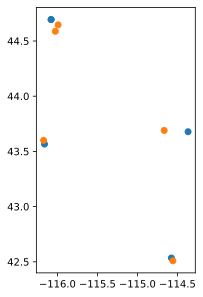

In [58]:
fig, ax = plt.subplots()

gdf[:5].plot(ax=ax)
gdf_j[:5].plot(ax=ax)

In [6]:
sigma = 0.1
test = df_obs["latitude"].apply(lambda x: x + np.random.normal(x, sigma))
# df['School_Long'] = df['School_Long'].apply(lambda x: x + np.random.normal(x, sigma, 1))

<Axes: xlabel='datetime_utc'>

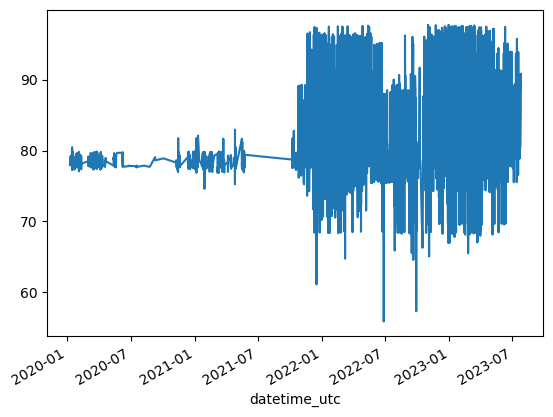

In [7]:
test.plot()

In [41]:
import geopandas as gpd
import xarray as xr

ds = xr.open_dataset("/Users/dillonragar/Downloads/USGS_AK5M_donlin.tif")

In [ ]:
Upper Left ( -499125.000, 1372175.000) (163d35'29.37"W, 62d 0' 3.06"N) 
Lower Left ( -499125.000, 1137050.000) (162d59' 3.18"W, 59d55' 8.54"N) 
Upper Right ( -195375.000, 1372175.000) (157d46'36.10"W, 62d16'26.60"N) 
Lower Right ( -195375.000, 1137050.000) (157d32' 6.02"W, 60d10'29.56"N) 




In [84]:
bbox = box(-18238817, 8268922, -17410460, 9233388)

In [116]:
import geopandas as gpd
from shapely.geometry import Polygon

coords = [
    (-240000.000, 1352000.000),
    (-240000.000, 1310000.000),
    (-209000.000, 1310000.000),
    (-209000.000, 1352000.000),
]


polygon = Polygon(coords)

gdf = gpd.GeoDataFrame(index=["Test"], crs="epsg:3338", geometry=[polygon])

In [111]:
gdf

,geometry
Test,"POLYGON ((-240000.000 1352000.000, -240000.000..."


In [119]:
gdf.to_file("/Users/dillonragar/Downloads/med_ak_domain.shp",
            driver="ESRI Shapefile")

In [131]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set a common time index
time_index = pd.date_range(start="2023-01-01", end="2023-01-10", freq="D")

# Create random data for each column with different lengths
data_col1 = np.random.rand(len(time_index))
data_col2 = np.random.rand(len(time_index))  # Shorten by 2 days
data_col3 = np.random.rand(len(time_index))  # Extend by 3 days

# Create the DataFrame
df = pd.DataFrame(
    {
        "Timestamp": time_index,
        "Column1": data_col1,
        "Column2": data_col2,
        "Column3": data_col3,
    }
)

df["Column1"][5:] = np.nan
df["Column2"][7:] = np.nan
df["Column3"][8:] = np.nan

# Find the average of the data at each time step until there is no valid data
averages = []
for timestamp in time_index:
    # Extract data for the current timestamp
    data_at_timestamp = df.loc[
        df["Timestamp"] == timestamp, ["Column1", "Column2", "Column3"]
    ].values.flatten()

    # Calculate the average excluding NaN values
    average_at_timestamp = np.nanmean(data_at_timestamp)

    # Append the average to the list
    averages.append(average_at_timestamp)

# Create a new DataFrame with Timestamp and Average columns
result_df = pd.DataFrame({"Timestamp": time_index, "Average": averages})

/var/folders/gn/5y1phzn924x_sl655cld27hm0000gp/T/ipykernel_63234/366978578.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Column1'][5:] = np.nan
/var/folders/gn/5y1phzn924x_sl655cld27hm0000gp/T/ipykernel_63234/366978578.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Column2'][7:] = np.nan
/var/folders/gn/5y1phzn924x_sl655cld27hm0000gp/T/ipykernel_63234/366978578.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

In [133]:
df

,Timestamp,Column1,Column2,Column3
0,2023-01-01,0.022198,0.979900,0.328825
1,2023-01-02,0.057221,0.846740,0.747990
2,2023-01-03,0.303575,0.929397,0.654177
3,2023-01-04,0.737484,0.751671,0.373678
4,2023-01-05,0.122471,0.622714,0.590370
5,2023-01-06,NaN,0.279168,0.371288
6,2023-01-07,NaN,0.440117,0.752227
7,2023-01-08,NaN,NaN,0.911229
8,2023-01-09,NaN,NaN,NaN
9,2023-01-10,NaN,NaN,NaN


<Axes: >

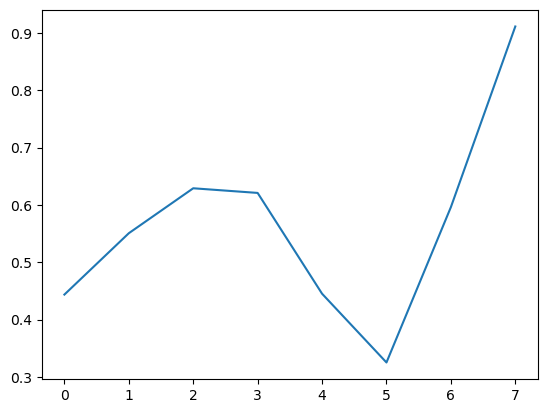

In [138]:
result_df["Average"].plot()

<Axes: >

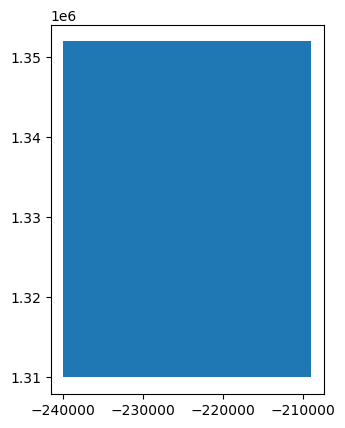

In [118]:
gdf.plot()

In [67]:
gpd.GeoDataFrame(geoms, crs="EPSG:3857")

ValueError: DataFrame constructor not properly called!

In [57]:
Upper Left ( -499125.000, 1372175.000) (163d35'29.37"W, 62d 0' 3.06"N) 
Lower Left ( -499125.000, 1137050.000) (162d59' 3.18"W, 59d55' 8.54"N) 
Upper Right ( -195375.000, 1372175.000) (157d46'36.10"W, 62d16'26.60"N) 
Lower Right ( -195375.000, 1137050.000) (157d32' 6.02"W, 60d10'29.56"N) 

<xarray.DataArray 'band_data' (band: 1, y: 47025, x: 60750)>
[2856768750 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -4.991e+05 -4.991e+05 ... -1.954e+05 -1.954e+05
  * y            (y) float64 1.372e+06 1.372e+06 ... 1.137e+06 1.137e+06
    spatial_ref  int64 ...
Attributes:
    AREA_OR_POINT:  Area

In [49]:
gdf = gpd.read_file("/Users/dillonragar/Downloads/USGS_AK5M_donlin.tif")

DriverError: '/Users/dillonragar/Downloads/USGS_AK5M_donlin.tif' not recognized as a supported file format.

In [ ]:
gdf

In [4]:
df_obs = pd.read_csv("./data/obs_data_firestore.csv")
df_obs.index = pd.to_datetime(df_obs["updatedAt_UTC"])
# remove leading whitespace from df
df_obs = df_obs.replace(r"^ +| +$", r"", regex=True)

In [26]:
df_obs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17942 entries, 2023-01-01 08:07:32 to 2023-07-11 05:36:48
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   createdAt      17942 non-null  int64  
 1   id             17942 non-null  object 
 2   updatedAt      17942 non-null  int64  
 3   userId         17911 non-null  object 
 4   phase          17704 non-null  object 
 5   latitude       17942 non-null  float64
 6   longitude      17942 non-null  float64
 7   updatedAt_UTC  17942 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.7+ MB


In [25]:
df_obs.loc["2020-10-01":"2023-10-01"]

,createdAt,id,updatedAt,userId,phase,latitude,longitude,updatedAt_UTC
updatedAt_UTC,,,,,,,,
2023-01-01 08:07:32,1672560452169,bd5db570-0c6f-4e92-bcc3-c31ba16d339e,1672560452169,q3QCgf6U4Ecl6iDmx2YCFtx2cvj1,Rain,34.218945,-116.341189,2023-01-01 08:07:32
2023-01-01 08:28:00,1672561680698,f1201efd-2e35-45df-a55e-806b59bd5e8a,1672561680698,K0KHTZcWauaGsXekTqHDMGHPeek2,Snow,39.602351,-119.869214,2023-01-01 08:28:00
2023-01-01 08:28:10,1672561690918,8f52b842-618f-4e6b-b43a-df3acec0cac7,1672561690918,K0KHTZcWauaGsXekTqHDMGHPeek2,Snow,39.602351,-119.869214,2023-01-01 08:28:10
2023-01-01 10:04:37,1672567477835,0640ab35-5d01-4dfe-b3a5-c49ae663f60a,1672567477835,YqBcqszNyEX7TOFNFBdNuVQAaWD3,Rain,41.089525,-73.841906,2023-01-01 10:04:37
2023-01-01 11:13:18,1672571598606,46cdd7d5-ce7a-4e72-a0bb-41b559c7e971,1672571598606,2EvA3Bhd9bQp6ruRHEe3PuPAlZv1,Snow,39.522458,-119.954163,2023-01-01 11:13:18
...,...,...,...,...,...,...,...,...
2023-07-10 20:47:43,1689022063581,4e50196e-6215-4830-944c-d1f5b1153b45,1689022063581,CRb5o8WczbT514n40lWSyQp3WTi1,Rain,46.872866,-114.031088,2023-07-10 20:47:43
2023-07-11 00:14:18,1689034458597,6879db15-b07a-4f1e-af6b-9be0dbc53b83,1689034458597,9jcdZpPw50WpMTxkmBFX7x0t6el1,Rain,44.337611,-71.464853,2023-07-11 00:14:18
2023-07-11 01:20:38,1689038438960,64440701-3b21-48fe-8d4c-d7194589d833,1689038438960,Ons5ujgNyXYUCHfPmejWXNE5Lrr2,Rain,44.502951,-73.002297,2023-07-11 01:20:38


In [33]:
df_obs = pd.read_csv("data/mros_met_geog_2023_09_21_noAKCA.csv")
df_obs.index = pd.to_datetime(df_obs["datetime_utc"])

In [34]:
df_obs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39646 entries, 2021-10-25 04:11:00 to 2023-03-22 13:52:00
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   all.id                       39646 non-null  int64  
 1   id                           39646 non-null  object 
 2   latitude                     39646 non-null  float64
 3   longitude                    39646 non-null  float64
 4   phase                        39646 non-null  object 
 5   timezone                     39646 non-null  object 
 6   timezone_lst                 39646 non-null  object 
 7   datetime_utc                 39646 non-null  object 
 8   datetime_lst                 39646 non-null  object 
 9   elevation.m                  39646 non-null  float64
 10  ecoregion3                   39646 non-null  object 
 11  ecoregion4                   39646 non-null  object 
 12  state                        39646 non-

In [37]:
phases = ["Rain", "Snow"]
start = "2020-10-01"
end = "2023-10-01"

df_sub = df_obs[df_obs.phase.isin(phases)].loc[start:end]

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [32]:
df[df["datetime_utc"].between("2020-10-01", "2023-10-01")]

,all.id,id,latitude,longitude,phase,timezone,timezone_lst,datetime_utc,datetime_lst,elevation.m,...,temp_dew_avg_dist,temp_dew_nearest_id,temp_dew_nearest_elev,temp_dew_nearest_dist,temp_dew_nearest,rh,temp_wet,hads_counts,lcd_counts,wcc_counts
datetime_utc,,,,,,,,,,,,,,,,,,,,,
2021-10-25 04:11:00,8478,455189ab-1c2c-4545-9d09-eb677a1ffb80,42.534433,-114.574686,Rain,America/Boise,Etc/GMT+7,2021-10-25 04:11,2021-10-24 22:11,1202.378540,...,60655.71693,72586694178,1269.80000,10122.713240,6.111111,80.711547,7.690869,12.0,3.0,6.0
2021-11-09 14:50:00,8484,220a8e3b-babb-4342-a7f3-db16a331c6bd,43.565984,-116.161259,Rain,America/Boise,Etc/GMT+7,2021-11-09 14:50,2021-11-09 07:50,842.985535,...,52732.72522,LLAI1,872.45807,4023.697297,5.183126,53.393553,1.240968,17.0,5.0,13.0
2021-12-22 18:38:00,8890,cebee6bd-7aa3-4b39-814e-4756930ee30b,43.678011,-114.366098,Snow,America/Boise,Etc/GMT+7,2021-12-22 18:38,2021-12-22 11:38,1774.080933,...,60103.75726,OHOI1,1890.00000,9552.606905,-3.057018,81.544568,-2.396512,24.0,3.0,21.0
2022-04-28 21:23:00,11968,41a3d741-3d7b-4f0b-bba4-4e8369a08de4,44.694154,-116.078291,Rain,America/Boise,Etc/GMT+7,2022-04-28 21:23,2022-04-28 15:23,1481.619995,...,56111.09982,72586494182,1531.10000,22339.154560,-0.555556,78.867963,2.355526,16.0,1.0,14.0
2022-04-28 22:34:00,11969,9237b97b-d02a-4ac3-acb3-73a2dec4fa8c,44.694169,-116.078291,Mix,America/Boise,Etc/GMT+7,2022-04-28 22:34,2022-04-28 16:34,1481.566406,...,56111.08497,72586494182,1531.10000,22337.489580,-1.111111,78.525709,2.290342,16.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 16:23:00,21984,4ac1afac-754d-4304-a222-0dab1d0aa140,33.584232,-112.209530,Rain,America/Phoenix,Etc/GMT+7,2023-01-01 16:23,2023-01-01 09:23,355.199646,...,48204.68196,72278753126,324.90000,10156.095520,11.111111,89.683098,11.438172,8.0,11.0,0.0
2023-01-01 18:41:00,21992,917ab5a2-4b4e-40b9-8b91-229c89803162,33.584268,-112.209704,Rain,America/Phoenix,Etc/GMT+7,2023-01-01 18:41,2023-01-01 11:41,355.279968,...,47431.54844,72278753126,324.90000,10145.963870,12.222222,93.656196,12.045899,8.0,11.0,0.0
2023-01-02 03:32:00,22015,1fa6cfe7-6cae-42b9-8327-c744639642f6,33.584269,-112.209555,Rain,America/Phoenix,Etc/GMT+7,2023-01-02 03:32,2023-01-01 20:32,355.288544,...,50092.42150,72278523111,330.70000,15064.366420,10.000000,86.266023,8.240029,8.0,10.0,0.0
